In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn import metrics 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 7.5 MB/s eta 0:00:0000:0100:01


In [3]:
from xgboost import XGBClassifier 

In [4]:
# The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data.

df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
From the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and
holidays Stock Market remains closed hence no trading happens on these days.


'\nFrom the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and\nholidays Stock Market remains closed hence no trading happens on these days.\n'

In [6]:

From this, we got to know that there are 1692 rows of data available and for each row, we have 7 different features or columns.

df.shape

(2416, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


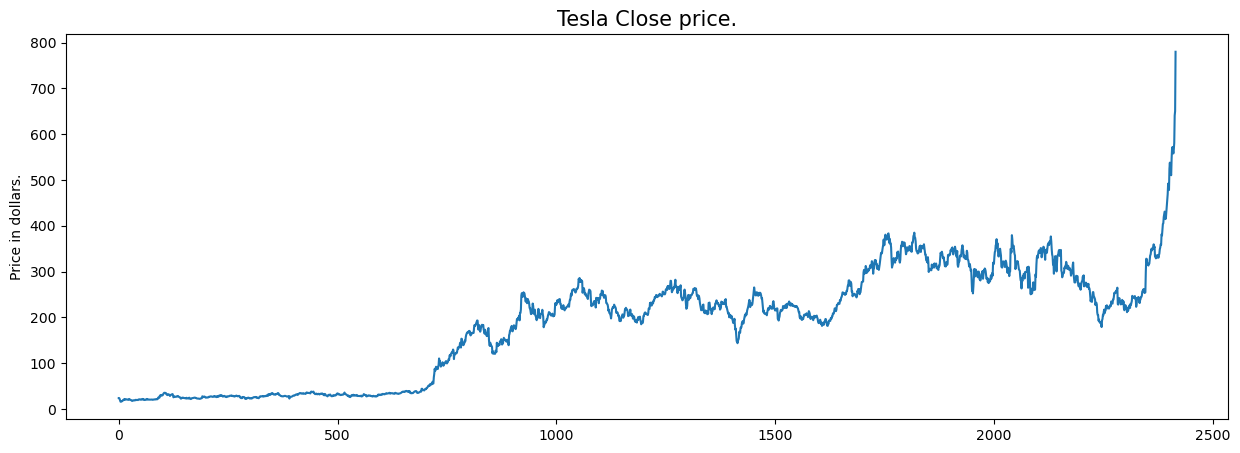

In [9]:
# Exploratory Data Analysis
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('Tesla Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [11]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [12]:
df = df.drop(['Adj Close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset.
Before moving further let’s check for the null values if any are present in the data frame.

In [13]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

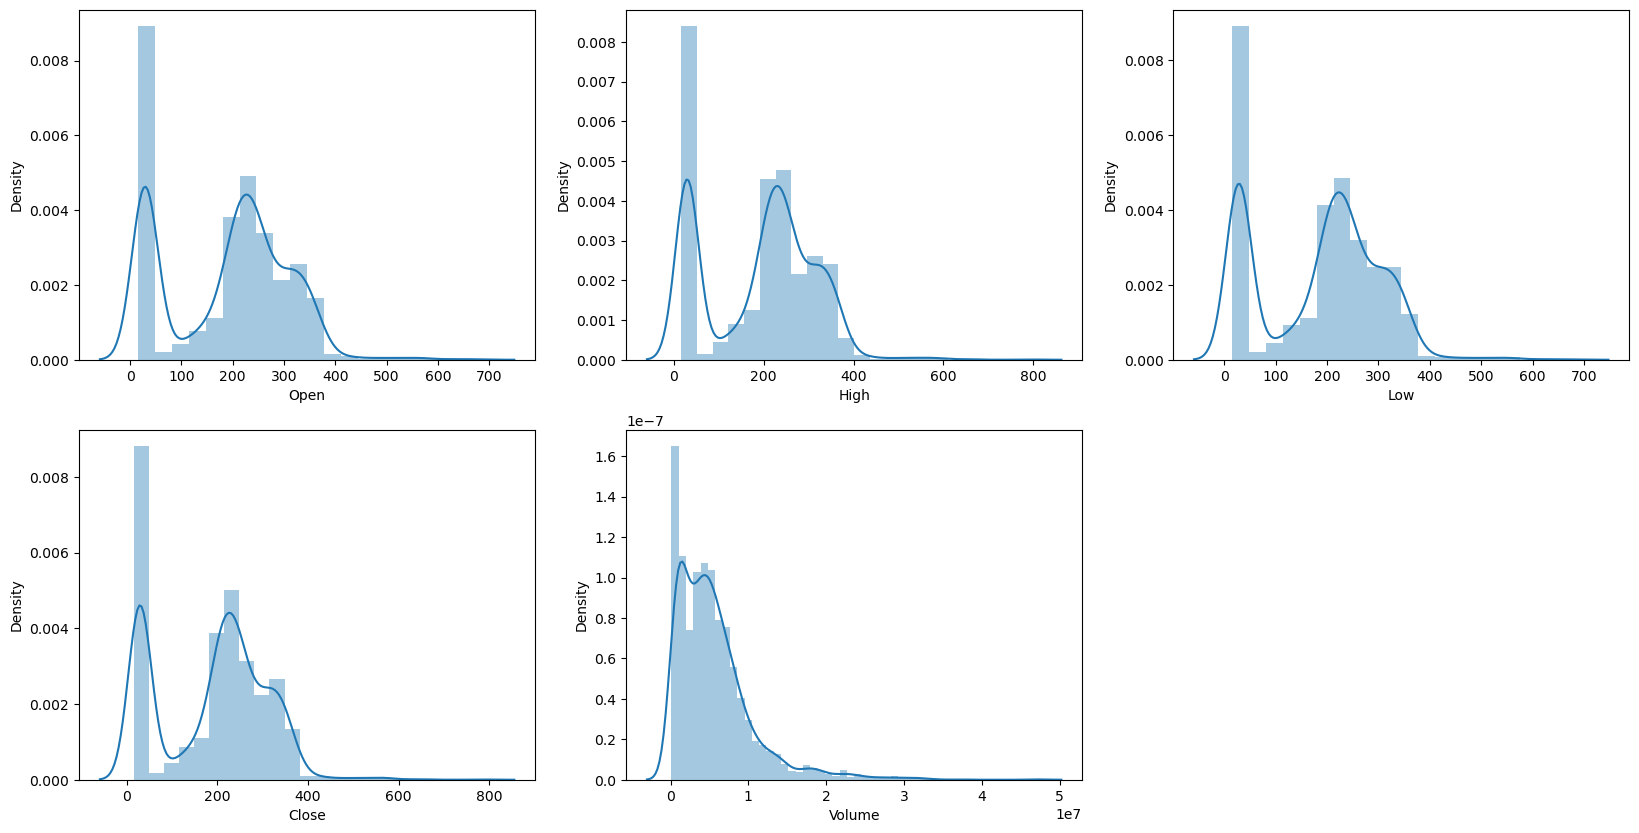

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 

plt.subplots(figsize=(20,10)) 

for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sb.distplot(df[col]) 
plt.show()

In the distribution plot of data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

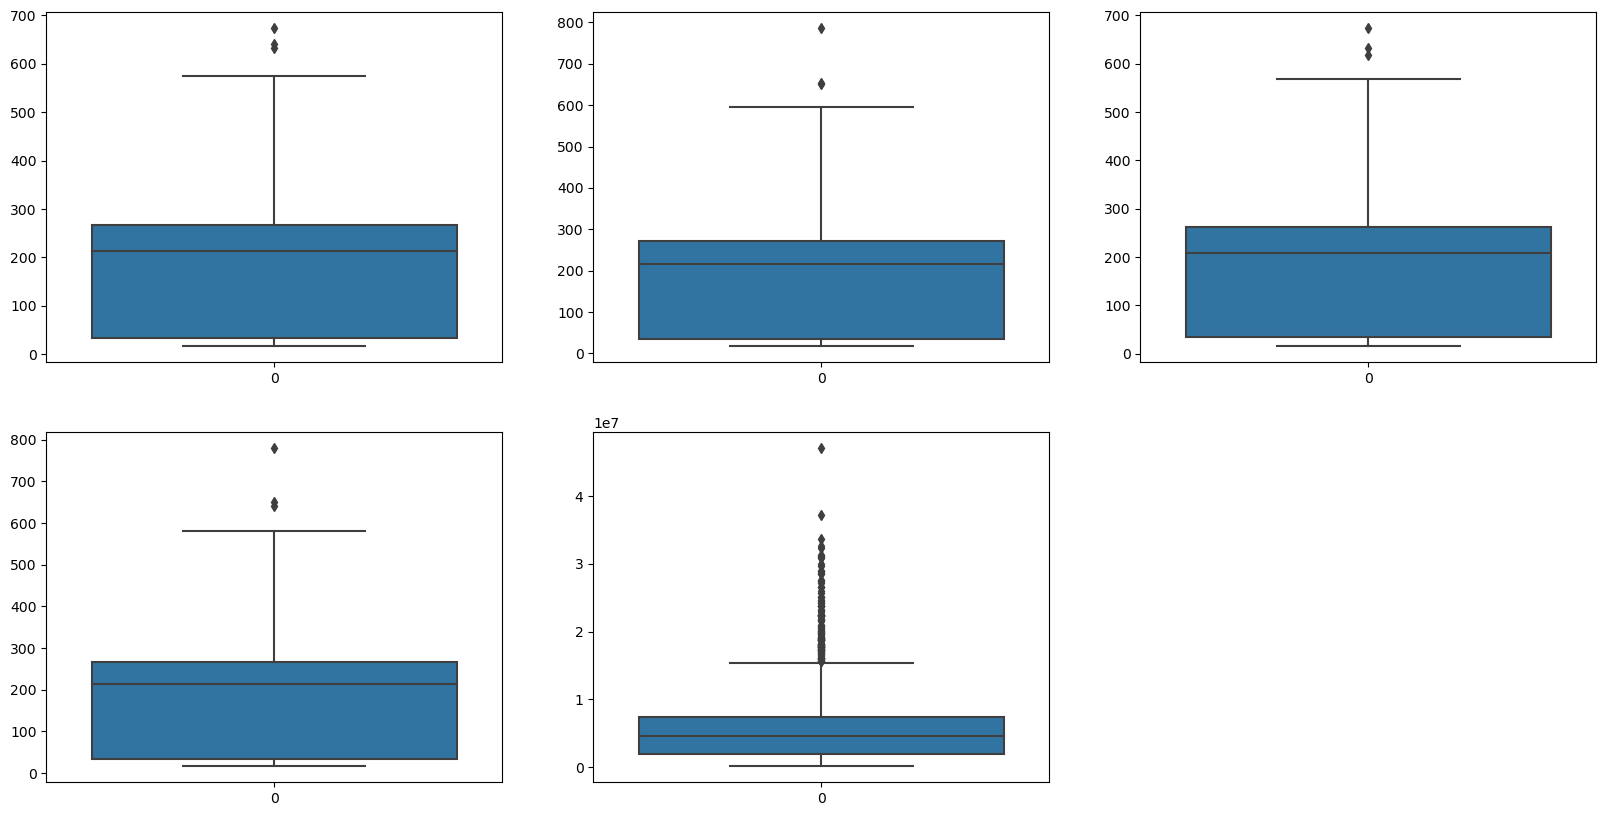

In [15]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sb.boxplot(df[col]) 
plt.show()

From the above boxplots, we can conclude that data contains outliers.

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [19]:
#Feature Engineering
splitted = df['Date'].str.split('-', expand=True) 

df['day'] = splitted[2].astype('int') 
df['month'] = splitted[1].astype('int') 
df['year'] = splitted[0].astype('int') 

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [20]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


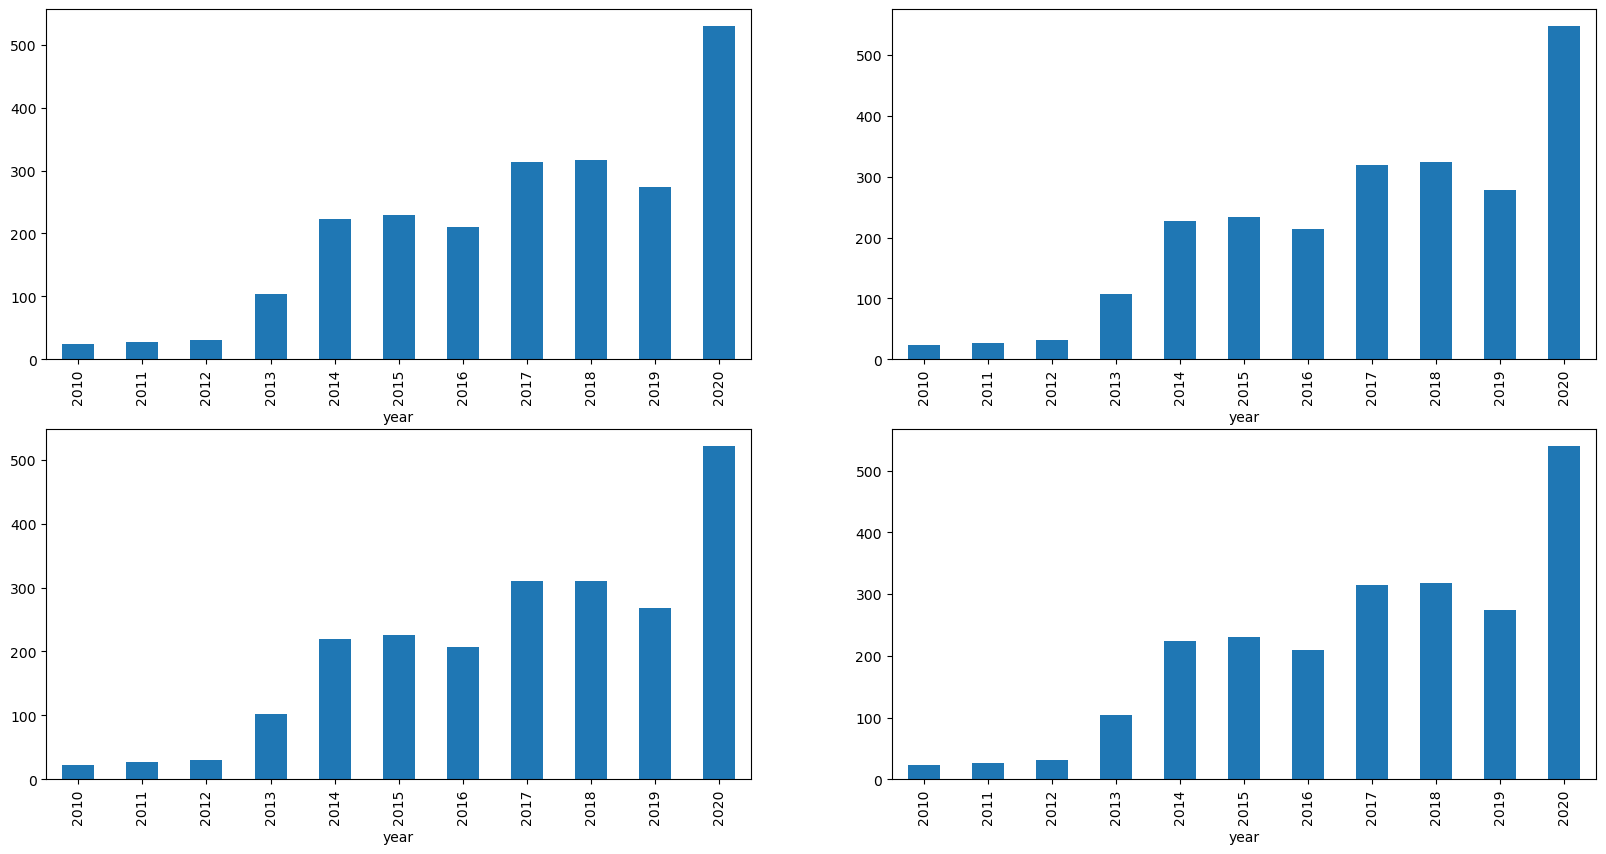

In [22]:
data_grouped = df.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 

for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
    plt.subplot(2,2,i+1) 
    data_grouped[col].plot.bar() 
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2019 to that in 2020.

In [23]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [25]:
df['open-close'] = df['Open'] - df['Close'] 
df['low-high'] = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

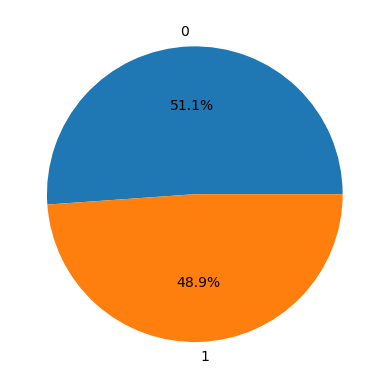

In [26]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%') 
plt.show()

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

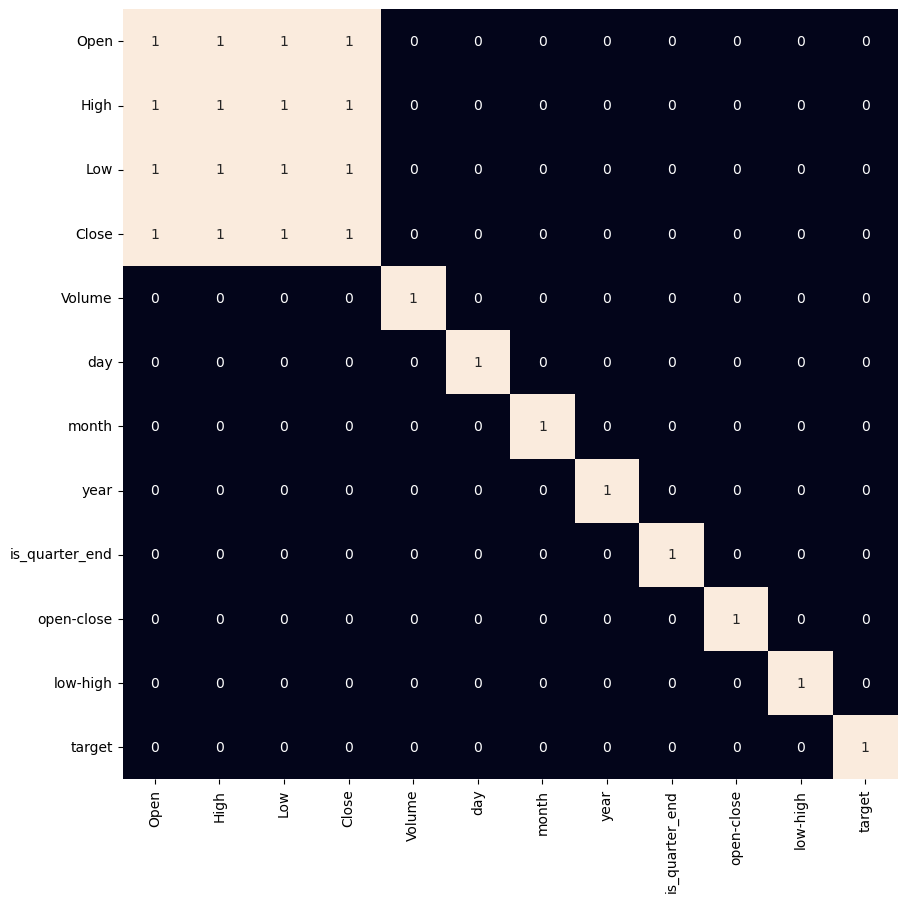

In [27]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
plt.show() 

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

# Data Splitting and Normalization

In [42]:
features = df[['open-close', 'low-high', 'is_quarter_end']] 
target = df['target'] 

scaler = StandardScaler() 
features = scaler.fit_transform(features) 

X_train, X_test, Y_train, Y_test = train_test_split( 
	features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(2174, 3) (242, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

In [43]:
models = [LogisticRegression(), SVC( 
kernel='poly', probability=True), XGBClassifier()] 

for i in range(3): 
    models[i].fit(X_train, Y_train) 

    print(f'{models[i]} : ') 
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1])) 
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test)[:,1])) 
    print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294580830338206
Validation Accuracy :  0.46257525998905313

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

In [44]:
from sklearn.metrics import confusion_matrix
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid) 
plt.show()


AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [49]:
stock_data = df[['Date', 'Close']]
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

In [50]:
# to find rolling mean or moving average
rolling_mean = stock_data['Close'].rolling(48).mean()
rolling_std = stock_data['Close'].rolling(48).std()

In [51]:
rolling_mean

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2020-01-28    421.607293
2020-01-29    426.419793
2020-01-30    432.280002
2020-01-31    438.495627
2020-02-03    447.353336
Name: Close, Length: 2416, dtype: float64

In [52]:
rolling_std

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2020-01-28     81.531141
2020-01-29     83.994235
2020-01-30     88.896981
2020-01-31     93.491624
2020-02-03    104.847549
Name: Close, Length: 2416, dtype: float64

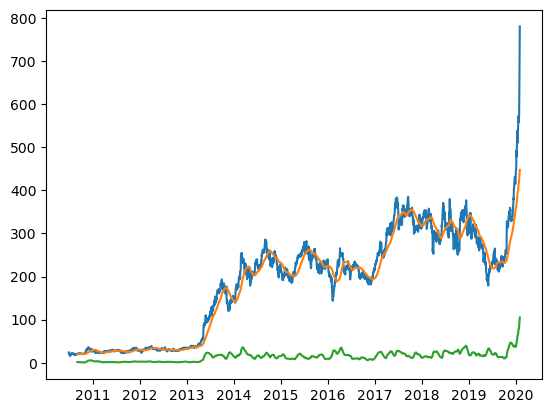

In [53]:
plt.plot(stock_data.Close)
plt.plot(rolling_mean)
plt.plot(rolling_std)

from the plot above, it is clear that time series is non stationary Lets reverify by statistical test as well >> ADF test

In [54]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])
adft   # null hypothesis of adf test is time series is non stationary, pavalue<0.05, reject null hypothesis
# here p value > 0.05, it means series is non stationary

(1.400068502086158,
 0.9971144530803391,
 18,
 2397,
 {'1%': -3.4330810457844425,
  '5%': -2.862746538733181,
  '10%': -2.567412291147901},
 16128.395638116252)

In [55]:
pd.Series(adft[0:4], index = ['test_statistics', 'p-value', 'lag', 'no of data points'])

test_statistics         1.400069
p-value                 0.997114
lag                    18.000000
no of data points    2397.000000
dtype: float64

In [56]:
# Test for stationary
def test_stationary(timeseries):
    # determing rolling statistics
    rolmean = timeseries.rolling(48).mean()  # rolling mean
    rolstd = timeseries.rolling(48).mean()  # rolling standard deviation
    # plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color = 'blue', label = 'original', linewidth = 3)
    plt.plot(rolmean, color='red', label = 'rolling mean', linewidth = 3)
    plt.plot(rolstd, color = 'black', label = 'rolling std', linewidth = 2)
    plt.legend(loc = 'best', fontsize = 20, shadow= True, facecolor = 'lightpink', edgecolor = 'k')
    plt.title('rolling mean and standard deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print('Results of dickey fuller test')
    adft = adfuller(timeseries, autolag = 'AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4], index= ['Test statistics','p-value', 'No. of lags used','number of observation used' ])
    for key, values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

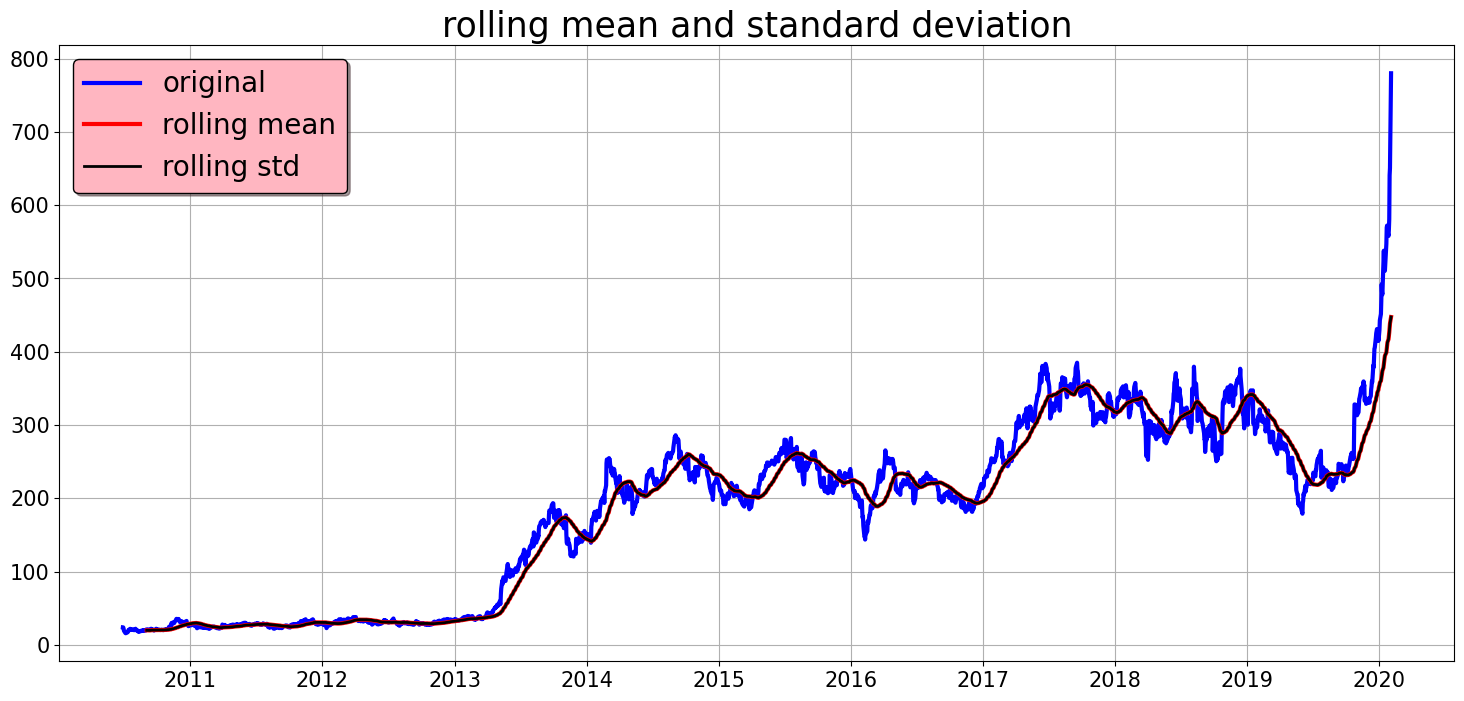

Results of dickey fuller test
Test statistics                  1.400069
p-value                          0.997114
No. of lags used                18.000000
number of observation used    2397.000000
critical value (1%)             -3.433081
critical value (5%)             -2.862747
critical value (10%)            -2.567412
dtype: float64


In [57]:
test_stationary(stock_data.Close)

In [58]:
# series is non stationary
# a time series is made up of level, trend, seasonlity, noise
# time series is of two types >> additive and multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12)  # for 12 months